# **RETAIL SALES DATA ANALYSIS**

# 🛍️ Retail Sales Data Analysis
**Purpose:** Explore trends in store performance, markdowns, and economic factors.


In [13]:
print(os.getcwd())  

c:\Users\petal\Downloads\CI-DBC\retail_sales_analysis


## Objectives
- Load and merge store, features, and sales data into a clean DataFrame.
- Analyze the impact of markdowns, holidays, and external factors on weekly sales.

## Inputs
- `stores_data_set.csv`, `features_data_set.csv`, `sales_data_set.csv` in /data folder.
- Python libraries: pandas, seaborn, plotly, os

## Outputs
- Merged DataFrame `df` ready for analysis.
- Visual outputs: trend line chart, scatter plot, box plot, heatmap.

## Additional Comments
- Working directory changed to project root for correct file paths.


This section loads the three CSV files from the dataset:
## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

# Change working directory

In [ ]:
import os
current_dir = os.getcwd()
current_dir
import os

current_dir = os.getcwd()
print("Current Directory:", current_dir)

# Move up if needed
os.chdir(os.path.dirname(current_dir))
print("New Directory:", os.getcwd())


Current Directory: c:\Users\petal\Downloads\CI-DBC\retail_sales_analysis
New Directory: c:\Users\petal\Downloads\CI-DBC


We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [15]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [16]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\petal\\Downloads\\CI-DBC'

# Section 1

Section 1 content

In [ ]:
# Section 1: Load Data

In [4]:
stores = pd.read_csv('../data/stores_data_set.csv')
features = pd.read_csv('../data/features_data_set.csv')
sales = pd.read_csv('../data/sales_data_set.csv')


In [5]:
import pandas as pd

stores = pd.read_csv('../data/stores_data_set.csv')
features = pd.read_csv('../data/features_data_set.csv')
sales = pd.read_csv('../data/sales_data_set.csv')

print("Stores Data:")
print(stores.head(), "\n")

print("Features Data:")
print(features.head(), "\n")

print("Sales Data:")
print(sales.head())


Stores Data:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875 

Features Data:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.3

---

In [6]:
# Shape of each dataset
print("Stores shape:", stores.shape)
print("Features shape:", features.shape)
print("Sales shape:", sales.shape)

# Check missing values
print("\nMissing values in Stores:\n", stores.isnull().sum())
print("\nMissing values in Features:\n", features.isnull().sum())
print("\nMissing values in Sales:\n", sales.isnull().sum())


Stores shape: (45, 3)
Features shape: (8190, 12)
Sales shape: (421570, 5)

Missing values in Stores:
 Store    0
Type     0
Size     0
dtype: int64

Missing values in Features:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Missing values in Sales:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


### Stores: Clean, no missing data

### Sales: Clean, no missing data

### Features: Lots of missing values, especially in:

MarkDown1 to MarkDown5 (several missing)

CPI and Unemployment (585 rows missing)



# Section 2

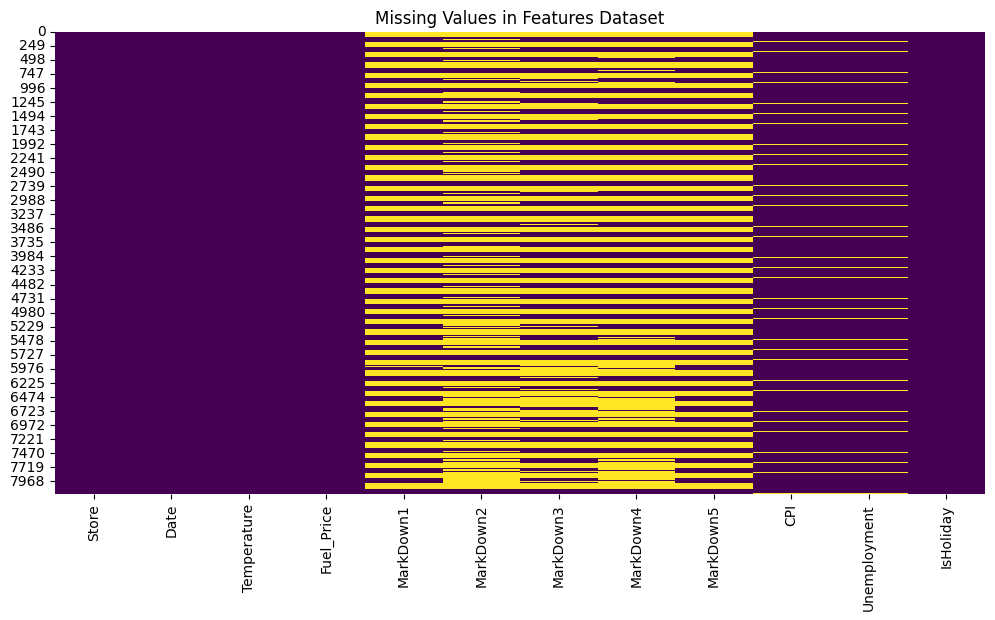

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(features.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Features Dataset")
plt.show()

In [9]:
# Fill missing markdowns with 0 (no promo that week)
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features[markdown_cols] = features[markdown_cols].fillna(0)

# Forward-fill CPI and Unemployment
features[['CPI', 'Unemployment']] = features[['CPI', 'Unemployment']].ffill()


# Confirm it's clean now
print("Remaining nulls:\n", features.isnull().sum())


Remaining nulls:
 Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


### Filling Missing MarkDowns

Missing values in `MarkDown1` through `MarkDown5` were filled with 0.

Rationale:
- These values are likely missing by design (not by error).
- A missing value likely indicates that no promotion or markdown was applied for that particular week.
- Filling with 0 ensures accurate data aggregation without inflating any promotional impact.


---

### Forward-Filling CPI and Unemployment

Missing values in `CPI` and `Unemployment` were forward-filled.

Rationale:
- These are time-series macroeconomic indicators that change slowly.
- Forward fill ensures a consistent, temporally accurate estimate.
- This prevents data loss while preserving logical continuity in trends.


# Section 3

In [15]:
# Merge sales and features datasets on Store and Date
sales_features = pd.merge(sales, features, on=['Store', 'Date'], how='left')

# Merge the above with stores dataset on Store
full_data = pd.merge(sales_features, stores, on='Store', how='left')

# Confirm merge
print("Merged data shape:", full_data.shape)
full_data.head()



Merged data shape: (421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


In [17]:
# Drop the duplicate IsHoliday column
full_data.drop(columns=['IsHoliday_y'], inplace=True)
full_data.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)
print(full_data.columns)


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')


# Section 4

# Section 5

# Section 6

# Section 7


NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [12]:
import os
try:
  # create your folder here
  pass # os.makedirs(name='')
except Exception as e:
  print(e)

print("test")


test
